In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
p_train = pd.read_csv(os.path.join(datadir, 'p.train.csv'))
p_test = pd.read_csv(os.path.join(datadir, 'p.test.csv'))
p_2022 = pd.read_csv(os.path.join(datadir, 'p.20230101.csv'))
s_train = pd.read_csv(os.path.join(datadir, 's.train.csv'))
s_test = pd.read_csv(os.path.join(datadir, 's.test.csv'))
s_2022 = pd.read_csv(os.path.join(datadir, 's.20230101.csv'))

In [3]:
p_train.columns

Index(['event_identifier', 'arrival_identifier', 'network', 'station',
       'channel', 'location_code', 'source_latitude', 'source_longitude',
       'source_receiver_distance_km', 'source_receiver_back_azimuth',
       'source_depth_km', 'noise_variance', 'noise_minimum_value',
       'noise_maximum_value', 'signal_variance', 'signal_minimum_value',
       'signal_maximum_value', 'noise_dominant_frequency',
       'noise_dominant_amplitude', 'signal_dominant_frequency',
       'signal_dominant_amplitude', 'magnitude_type', 'magnitude',
       'avg_noise_1.00', 'avg_signal_1.00', 'avg_noise_2.00',
       'avg_signal_2.00', 'avg_noise_3.00', 'avg_signal_3.00',
       'avg_noise_4.00', 'avg_signal_4.00', 'avg_noise_5.00',
       'avg_signal_5.00', 'avg_noise_6.00', 'avg_signal_6.00',
       'avg_noise_7.00', 'avg_signal_7.00', 'avg_noise_8.00',
       'avg_signal_8.00', 'avg_noise_9.00', 'avg_signal_9.00',
       'avg_noise_10.00', 'avg_signal_10.00', 'avg_noise_11.00',
       'avg_sig

In [4]:
SMALL_SIZE=8
MEDIUM_SIZE=9
LARGE_SIZE=9
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

In [5]:
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

In [26]:
def plot_summary_hists(p_train, 
                       s_train, 
                        p_test, 
                        s_test, 
                        col_names, 
                        col_bins, 
                        xlabels, 
                        rotate_xlabels=False,
                        p_heldout=None,
                        s_heldout=None,
                        freq=False,
                        savefigname=None):
    p_train_color = '#b2182b' #'#d7191c'
    p_test_color = '#ef8a62' #'#fdae61'
    p_heldout_color = '#fddbc7'
    s_train_color = '#2166ac' #'#2c7bb6'
    s_test_color = '#67a9cf' #'#abd9e9'
    s_heldout_color = '#d1e5f0'
    train_test_labels = ['train', 'test A', 'test B']
                             
    fig, axes = plt.subplots(2, len(col_names), 
                            figsize=(2*len(col_names), 3),
                            constrained_layout=True)


    for aind1, phase in enumerate(['P', 'S']):
        if phase == 'P':
            train, test, heldout = p_train, p_test, p_heldout
            colors = [p_train_color, p_test_color, p_heldout_color]
        else:
            train, test, heldout = s_train, s_test, s_heldout
            colors = [s_train_color, s_test_color, s_heldout_color]
            for cind, xlabel in enumerate(xlabels):
                axes[1][cind].set_xlabel(f"{xlabel}")

        axes[aind1][-1].yaxis.set_label_position("right")
        axes[aind1][-1].set_ylabel(f'$\it{{{phase}}}$', rotation=0, labelpad=15)
        for sind, split in enumerate([train, test, heldout]):
            if split is None:
                continue
            for cind in range(len(col_names)):
                label = None
                if cind == 0:
                    label = f'{train_test_labels[sind]}' # $\it{{{phase}}}$ 

                weights = None
                if freq:
                    weights = np.zeros(split.shape[0]) + 1./split.shape[0]
                
                axes[aind1][cind].hist(split[col_names[cind]], 
                edgecolor="k", 
                bins=col_bins[cind], 
                color=colors[sind], 
                label=label,
                weights=weights);
    
                axes[aind1][cind].xaxis.set_minor_locator(AutoMinorLocator(2))
                axes[aind1][cind].yaxis.set_minor_locator(AutoMinorLocator(2))

        axes[aind1][0].legend(borderpad=0.1,
                              labelspacing=0.2,
                              handletextpad=0.4,
                              handlelength=1.0)

    suplabels = string.ascii_lowercase
    for i, ax in enumerate(axes.flatten()):
        ax.text(0, 1.03, f'({suplabels[i]})',
                transform=ax.transAxes)
    for cind in range(len(col_names)):
        if rotate_xlabels:
            axes[1][cind].tick_params(axis='x', labelrotation=45)    
        axes[0][cind].set_xticklabels([])    

    fig.supylabel("Count")    
    if savefigname is not None:
        fig.savefig(savefigname, dpi=300)
    # fig.tight_layout()


In [27]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", "source_receiver_distance_km", 'source_receiver_back_azimuth']
p_train[col_names].describe()

,Event-Mean-YPML-S,source_depth_km,source_receiver_distance_km,source_receiver_back_azimuth
count,65031.000000,65031.000000,65031.000000,65031.000000
mean,1.419544,7.228404,25.178732,170.744485
std,0.590792,2.829369,16.445976,113.404066
min,-0.041446,-3.470000,0.044877,0.002797
25%,1.003337,5.050000,13.660755,72.350219
50%,1.343190,7.310000,21.202774,147.014740
75%,1.755819,8.840000,32.944714,284.580938
max,4.332082,23.480000,112.392748,360.000000


In [28]:
s_train[col_names].describe()

,Event-Mean-YPML-S,source_depth_km,source_receiver_distance_km,source_receiver_back_azimuth
count,12738.000000,12738.000000,12738.000000,12738.000000
mean,1.292955,7.053548,19.271458,203.758234
std,0.548049,2.698973,11.352580,105.281054
min,-0.041446,-1.940000,0.044877,0.019791
25%,0.906778,5.000000,10.265148,98.093421
50%,1.241040,7.020000,16.892285,238.363649
75%,1.597180,8.577500,27.116965,293.110802
max,4.326333,23.480000,83.316436,359.987383


In [29]:
p_test[col_names].describe()

,Event-Mean-YPML-S,source_depth_km,source_receiver_distance_km,source_receiver_back_azimuth
count,16531.000000,16531.000000,16531.000000,16531.000000
mean,1.450467,7.119433,25.189669,169.882910
std,0.590935,2.748078,16.310817,113.779099
min,-0.303969,0.120000,0.204153,0.016445
25%,1.045508,5.020000,13.773993,71.375909
50%,1.366882,7.120000,21.320119,142.565607
75%,1.781522,8.600000,32.877409,284.333192
max,3.446631,18.440000,114.788943,360.000000


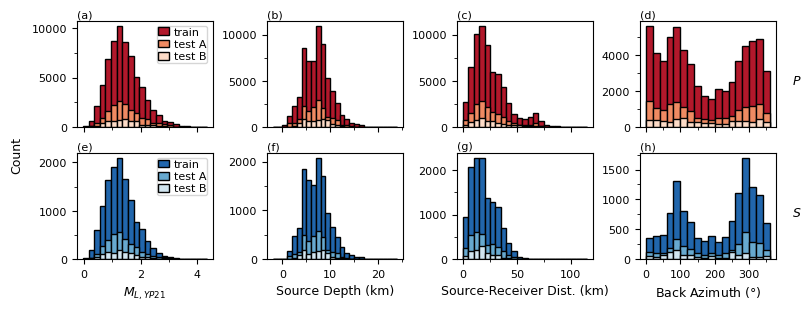

In [30]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", "source_receiver_distance_km", 'source_receiver_back_azimuth']
col_bins = [np.arange(-0.05, 4.5, 0.2), np.arange(-2.0, 25, 1), np.arange(0, 120, 5), np.arange(0, 370, 20)]
xlabels = ["$M_{L,YP21}$", "Source Depth (km)",'Source-Receiver Dist. (km)', 'Back Azimuth $(\degree)$']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels,
                    p_heldout=p_2022,
                    s_heldout=s_2022, freq=False)

In [31]:
p_train[['source_latitude', "source_longitude"]].describe()

,source_latitude,source_longitude
count,65031.000000,65031.000000
mean,44.689260,-110.838742
std,0.141514,0.221968
min,44.000167,-111.327833
25%,44.607167,-111.016000
50%,44.750833,-110.822667
75%,44.784083,-110.744667
max,45.040833,-109.969333


In [32]:
p_test[['source_latitude', "source_longitude"]].describe()

,source_latitude,source_longitude
count,16531.000000,16531.000000
mean,44.689728,-110.831568
std,0.139879,0.214765
min,44.023333,-111.304000
25%,44.605333,-111.012667
50%,44.750833,-110.810500
75%,44.784833,-110.735000
max,44.860833,-109.939500


In [33]:
s_train[['source_latitude', "source_longitude"]].describe()

,source_latitude,source_longitude
count,12738.000000,12738.000000
mean,44.695738,-110.851534
std,0.132355,0.208792
min,44.000167,-111.327833
25%,44.628000,-111.016000
50%,44.751500,-110.827333
75%,44.782000,-110.758500
max,45.040833,-110.020167


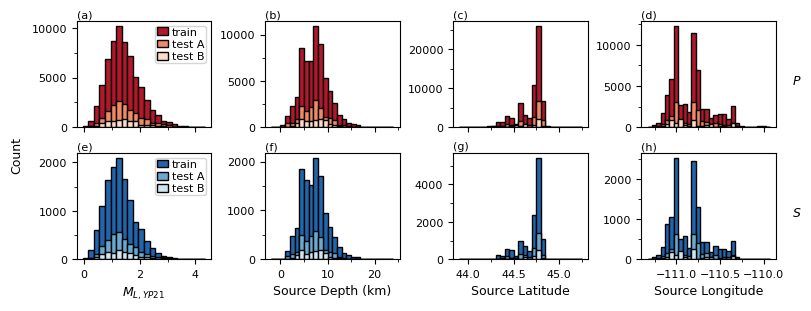

In [34]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", 'source_latitude', "source_longitude"]
col_bins = [np.arange(-0.05, 4.5, 0.2), np.arange(-2.0, 25, 1), np.arange(43.9, 45.3, 0.05), np.arange(-111.33, -109.9, 0.05)]
xlabels = ["$M_{L,YP21}$", "Source Depth (km)",'Source Latitude', 'Source Longitude']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels, rotate_xlabels=False,
                    p_heldout=p_2022,
                    s_heldout=s_2022,
                    savefigname='../figures/event_summary_histograms.png')

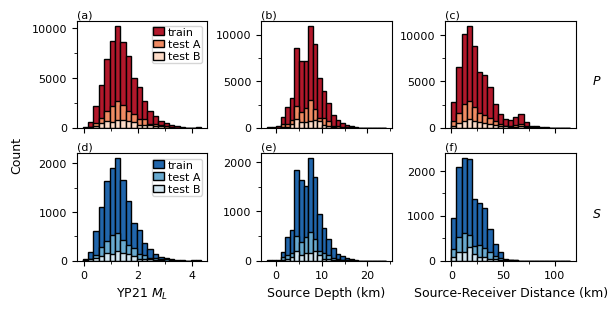

In [35]:
col_names = ["Event-Mean-YPML-S", "source_depth_km", "source_receiver_distance_km"]
col_bins = [np.arange(-0.05, 4.5, 0.2), np.arange(-2.0, 25, 1), np.arange(0, 120, 5)]
xlabels = ["YP21 $M_L$", "Source Depth (km)",'Source-Receiver Distance (km)']
plot_summary_hists(p_train, s_train, p_test, s_test, col_names, col_bins, xlabels,
                    p_heldout=p_2022,
                    s_heldout=s_2022)